<a href="https://colab.research.google.com/github/allyj92/python/blob/master/mae_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 (예제용 - 임의의 선형 데이터)
def generate_data(num_samples=1000):
    np.random.seed(0)
    X = np.random.rand(num_samples, 1) * 10  # 0~10 사이의 랜덤 숫자
    y = 2.5 * X + np.random.randn(num_samples, 1) * 2  # y = 2.5x + noise
    return X, y

# 데이터 로드
X, y = generate_data()
X_train, X_val = X[:800], X[800:]  # 학습 데이터: 80%
y_train, y_val = y[:800], y[800:]  # 검증 데이터: 20%

# 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

# 모델 학습
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 179.2867 - mae: 11.4402 - mse: 179.2867 - val_loss: 93.6196 - val_mae: 8.3154 - val_mse: 93.6196
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.2692 - mae: 7.1511 - mse: 72.2692 - val_loss: 19.5738 - val_mae: 3.5941 - val_mse: 19.5738
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3065 - mae: 2.5424 - mse: 10.3065 - val_loss: 4.7599 - val_mae: 1.7610 - val_mse: 4.7599
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9643 - mae: 1.5982 - mse: 3.9643 - val_loss: 4.3139 - val_mae: 1.6820 - val_mse: 4.3139
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5398 - mae: 1.4850 - mse: 3.5398 - val_loss: 4.3041 - val_mae: 1.6794 - val_mse: 4.3041
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7626 - mae: 1.5242 - mse: 3.7626 - val_loss: 4.2971 - val_mae: 1.6788 - val_mse: 4.2971
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4125 - mae: 1.4460 - mse: 3.4125 - val

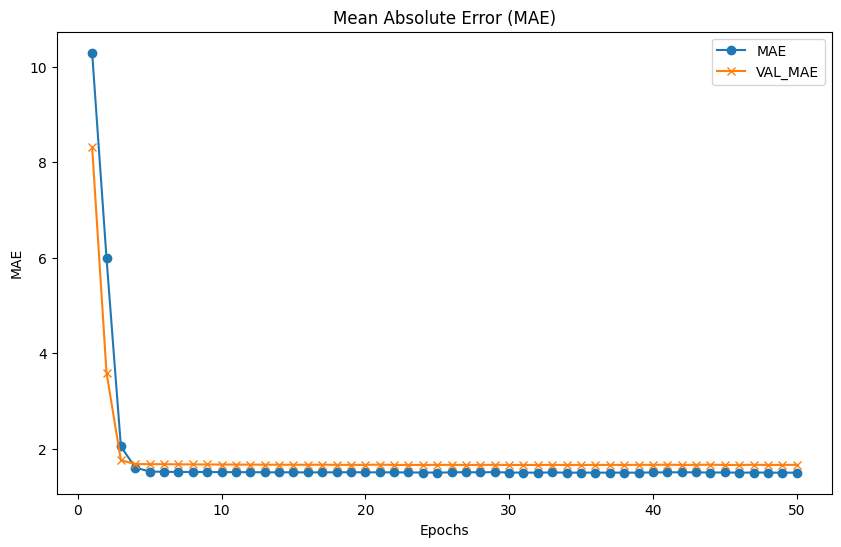

In [ ]:

hist = pd.DataFrame(history.history)
epochs = range(1,len(hist['mae'])+1)

plt.figure(figsize=(10,6))
plt.plot(epochs,hist['mae'],label="Train MAE",marker='o')
plt.plot(epochs,hist['val_mae'], label="Val MAE", marker='x')
plt.title("Mean Absolute Error (MAE)")
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['MAE','VAL_MAE'])
plt.grid=True
plt.show()